In [47]:
import requests
import json
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from termcolor import colored
import random
import plotly.figure_factory as ff
import warnings            
warnings.filterwarnings("ignore") 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [ ]:
mydf = pd.read_csv("C:/Users/17164/Desktop/GameStatsFinall.csv")

In [9]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53999 entries, 0 to 53998
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         53999 non-null  int64  
 1   Unnamed: 0.1       53999 non-null  int64  
 2   appid              53999 non-null  int64  
 3   name               53987 non-null  object 
 4   developer          53774 non-null  object 
 5   publisher          53834 non-null  object 
 6   score_rank         45 non-null     float64
 7   positive           53999 non-null  int64  
 8   negative           53999 non-null  int64  
 9   userscore          53999 non-null  int64  
 10  owners             53999 non-null  object 
 11  average_forever    53999 non-null  int64  
 12  average_2weeks     53999 non-null  int64  
 13  median_forever     53999 non-null  int64  
 14  median_2weeks      53999 non-null  int64  
 15  price              53965 non-null  float64
 16  initialprice       539

In [10]:
mydf.drop(['Unnamed: 0', 'Unnamed: 0.1', 'score_rank', 'userscore', 'total_positive', 
           'total_negative', 'total_reviews', 'review_score', 'review_score_desc', 'num_reviews'],
        axis=1, inplace=True)

In [11]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53999 entries, 0 to 53998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            53999 non-null  int64  
 1   name             53987 non-null  object 
 2   developer        53774 non-null  object 
 3   publisher        53834 non-null  object 
 4   positive         53999 non-null  int64  
 5   negative         53999 non-null  int64  
 6   owners           53999 non-null  object 
 7   average_forever  53999 non-null  int64  
 8   average_2weeks   53999 non-null  int64  
 9   median_forever   53999 non-null  int64  
 10  median_2weeks    53999 non-null  int64  
 11  price            53965 non-null  float64
 12  initialprice     53974 non-null  float64
 13  discount         53974 non-null  float64
 14  ccu              53999 non-null  int64  
 15  languages        53902 non-null  object 
 16  genre            53702 non-null  object 
 17  tags        

In [5]:
mydf.isnull()

,appid,name,developer,publisher,positive,negative,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,tags
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
53999,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54001,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
url = "https://steamspy.com/api.php"
request = "top100forever"
params = {'request' : request}
response = requests.get(url, params=params)

In [16]:
details = json.loads(response.text)
my_df = pd.DataFrame(details)
my_df2 = my_df.transpose()
my_df2

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
570,570,Dota 2,Valve,Valve,,1470745,298272,0,"100,000,000 .. 200,000,000",38449,1791,987,858,0,0,0,619140
730,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,,5732655,762978,0,"50,000,000 .. 100,000,000",30836,932,6916,308,0,0,0,842990
578080,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",,1149272,893425,0,"50,000,000 .. 100,000,000",22094,730,7132,174,0,0,0,322575
1063730,1063730,New World,Amazon Games,Amazon Games,,154477,73698,0,"50,000,000 .. 100,000,000",7574,985,3541,992,3999,3999,0,16942
440,440,Team Fortress 2,Valve,Valve,,819730,56584,0,"50,000,000 .. 100,000,000",9268,1847,343,399,0,0,0,125765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,40,Deathmatch Classic,Valve,Valve,,1917,423,0,"5,000,000 .. 10,000,000",6313,10077,7,20154,499,499,0,11
107410,107410,Arma 3,Bohemia Interactive,Bohemia Interactive,,203745,21722,0,"5,000,000 .. 10,000,000",10396,997,1209,1321,2999,2999,0,16117
273110,273110,Counter-Strike Nexon: Studio,"Valve Corporation, Nexon Korea Corporation",Nexon Korea Corporation,,26407,13411,0,"5,000,000 .. 10,000,000",1879,0,61,0,0,0,0,966
439700,439700,Z1 Battle Royale: Test Server,Daybreak Game Company,Daybreak Game Company,,1312,1182,0,"5,000,000 .. 10,000,000",102,0,24,0,0,0,0,1


In [17]:
my_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 570 to 10180
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   appid            100 non-null    object
 1   name             100 non-null    object
 2   developer        100 non-null    object
 3   publisher        100 non-null    object
 4   score_rank       100 non-null    object
 5   positive         100 non-null    object
 6   negative         100 non-null    object
 7   userscore        100 non-null    object
 8   owners           100 non-null    object
 9   average_forever  100 non-null    object
 10  average_2weeks   100 non-null    object
 11  median_forever   100 non-null    object
 12  median_2weeks    100 non-null    object
 13  price            100 non-null    object
 14  initialprice     100 non-null    object
 15  discount         100 non-null    object
 16  ccu              100 non-null    object
dtypes: object(17)
memory usage: 14.1+ KB

In [18]:
def loadAppDetails(appid):
    payload = {'request' : 'appdetails', 'appid' : appid}
    response = requests.get(url, params = payload)
    time.sleep(1)
    if(response.status_code == 200 and response.ok):
        return response.text
    else:
        return None

In [19]:
initialRun = True
for id_ in my_df2['appid']:
    appdetails = loadAppDetails(id_)
    if appdetails != None:
        appdetails = json.loads(appdetails)
        tags = ''
        for tag in appdetails['tags']:
            if(tags != ''):
                tags += ', ' + tag
            else:
                tags += tag

        appdetails['tags'] =  tags
        df_appDetails = pd.DataFrame(appdetails, index = [appdetails['appid']])

        if initialRun:
            df_games = df_appDetails
            initialRun = False
        else:         
            df_games = df_games.append(df_appDetails)

In [20]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 570 to 10180
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   appid            100 non-null    int64 
 1   name             100 non-null    object
 2   developer        100 non-null    object
 3   publisher        100 non-null    object
 4   score_rank       100 non-null    object
 5   positive         100 non-null    int64 
 6   negative         100 non-null    int64 
 7   userscore        100 non-null    int64 
 8   owners           100 non-null    object
 9   average_forever  100 non-null    int64 
 10  average_2weeks   100 non-null    int64 
 11  median_forever   100 non-null    int64 
 12  median_2weeks    100 non-null    int64 
 13  price            100 non-null    object
 14  initialprice     100 non-null    object
 15  discount         100 non-null    object
 16  ccu              100 non-null    int64 
 17  languages        100 non-null  

In [21]:
df_games.drop(['score_rank', 'userscore'], axis=1, inplace=True)

In [22]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 570 to 10180
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   appid            100 non-null    int64 
 1   name             100 non-null    object
 2   developer        100 non-null    object
 3   publisher        100 non-null    object
 4   positive         100 non-null    int64 
 5   negative         100 non-null    int64 
 6   owners           100 non-null    object
 7   average_forever  100 non-null    int64 
 8   average_2weeks   100 non-null    int64 
 9   median_forever   100 non-null    int64 
 10  median_2weeks    100 non-null    int64 
 11  price            100 non-null    object
 12  initialprice     100 non-null    object
 13  discount         100 non-null    object
 14  ccu              100 non-null    int64 
 15  languages        100 non-null    object
 16  genre            100 non-null    object
 17  tags             100 non-null  

In [30]:
df_games['price'] = df_games['price'].astype(float)
df_games['initialprice'] = df_games['initialprice'].astype(float)
df_games['discount'] = df_games['discount'].astype(float)

In [31]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 570 to 10180
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            100 non-null    int64  
 1   name             100 non-null    object 
 2   developer        100 non-null    object 
 3   publisher        100 non-null    object 
 4   positive         100 non-null    int64  
 5   negative         100 non-null    int64  
 6   owners           100 non-null    object 
 7   average_forever  100 non-null    int64  
 8   average_2weeks   100 non-null    int64  
 9   median_forever   100 non-null    int64  
 10  median_2weeks    100 non-null    int64  
 11  price            100 non-null    float64
 12  initialprice     100 non-null    float64
 13  discount         100 non-null    float64
 14  ccu              100 non-null    int64  
 15  languages        100 non-null    object 
 16  genre            100 non-null    object 
 17  tags        

In [35]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53999 entries, 0 to 53998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            53999 non-null  int64  
 1   name             53987 non-null  object 
 2   developer        53774 non-null  object 
 3   publisher        53834 non-null  object 
 4   positive         53999 non-null  int64  
 5   negative         53999 non-null  int64  
 6   owners           53999 non-null  object 
 7   average_forever  53999 non-null  int64  
 8   average_2weeks   53999 non-null  int64  
 9   median_forever   53999 non-null  int64  
 10  median_2weeks    53999 non-null  int64  
 11  price            53965 non-null  float64
 12  initialprice     53974 non-null  float64
 13  discount         53974 non-null  float64
 14  ccu              53999 non-null  int64  
 15  languages        53902 non-null  object 
 16  genre            53702 non-null  object 
 17  tags        

In [121]:
gamedf = mydf.append(df_games)
gamedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54099 entries, 0 to 10180
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            54099 non-null  int64  
 1   name             54087 non-null  object 
 2   developer        53874 non-null  object 
 3   publisher        53934 non-null  object 
 4   positive         54099 non-null  int64  
 5   negative         54099 non-null  int64  
 6   owners           54099 non-null  object 
 7   average_forever  54099 non-null  int64  
 8   average_2weeks   54099 non-null  int64  
 9   median_forever   54099 non-null  int64  
 10  median_2weeks    54099 non-null  int64  
 11  price            54065 non-null  float64
 12  initialprice     54074 non-null  float64
 13  discount         54074 non-null  float64
 14  ccu              54099 non-null  int64  
 15  languages        54002 non-null  object 
 16  genre            53802 non-null  object 
 17  tags        

In [122]:
gamedf = gamedf.sample(frac=1)

gamedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54099 entries, 25574 to 51244
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            54099 non-null  int64  
 1   name             54087 non-null  object 
 2   developer        53874 non-null  object 
 3   publisher        53934 non-null  object 
 4   positive         54099 non-null  int64  
 5   negative         54099 non-null  int64  
 6   owners           54099 non-null  object 
 7   average_forever  54099 non-null  int64  
 8   average_2weeks   54099 non-null  int64  
 9   median_forever   54099 non-null  int64  
 10  median_2weeks    54099 non-null  int64  
 11  price            54065 non-null  float64
 12  initialprice     54074 non-null  float64
 13  discount         54074 non-null  float64
 14  ccu              54099 non-null  int64  
 15  languages        54002 non-null  object 
 16  genre            53802 non-null  object 
 17  tags    

In [123]:
gamedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54099 entries, 25574 to 51244
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            54099 non-null  int64  
 1   name             54087 non-null  object 
 2   developer        53874 non-null  object 
 3   publisher        53934 non-null  object 
 4   positive         54099 non-null  int64  
 5   negative         54099 non-null  int64  
 6   owners           54099 non-null  object 
 7   average_forever  54099 non-null  int64  
 8   average_2weeks   54099 non-null  int64  
 9   median_forever   54099 non-null  int64  
 10  median_2weeks    54099 non-null  int64  
 11  price            54065 non-null  float64
 12  initialprice     54074 non-null  float64
 13  discount         54074 non-null  float64
 14  ccu              54099 non-null  int64  
 15  languages        54002 non-null  object 
 16  genre            53802 non-null  object 
 17  tags    

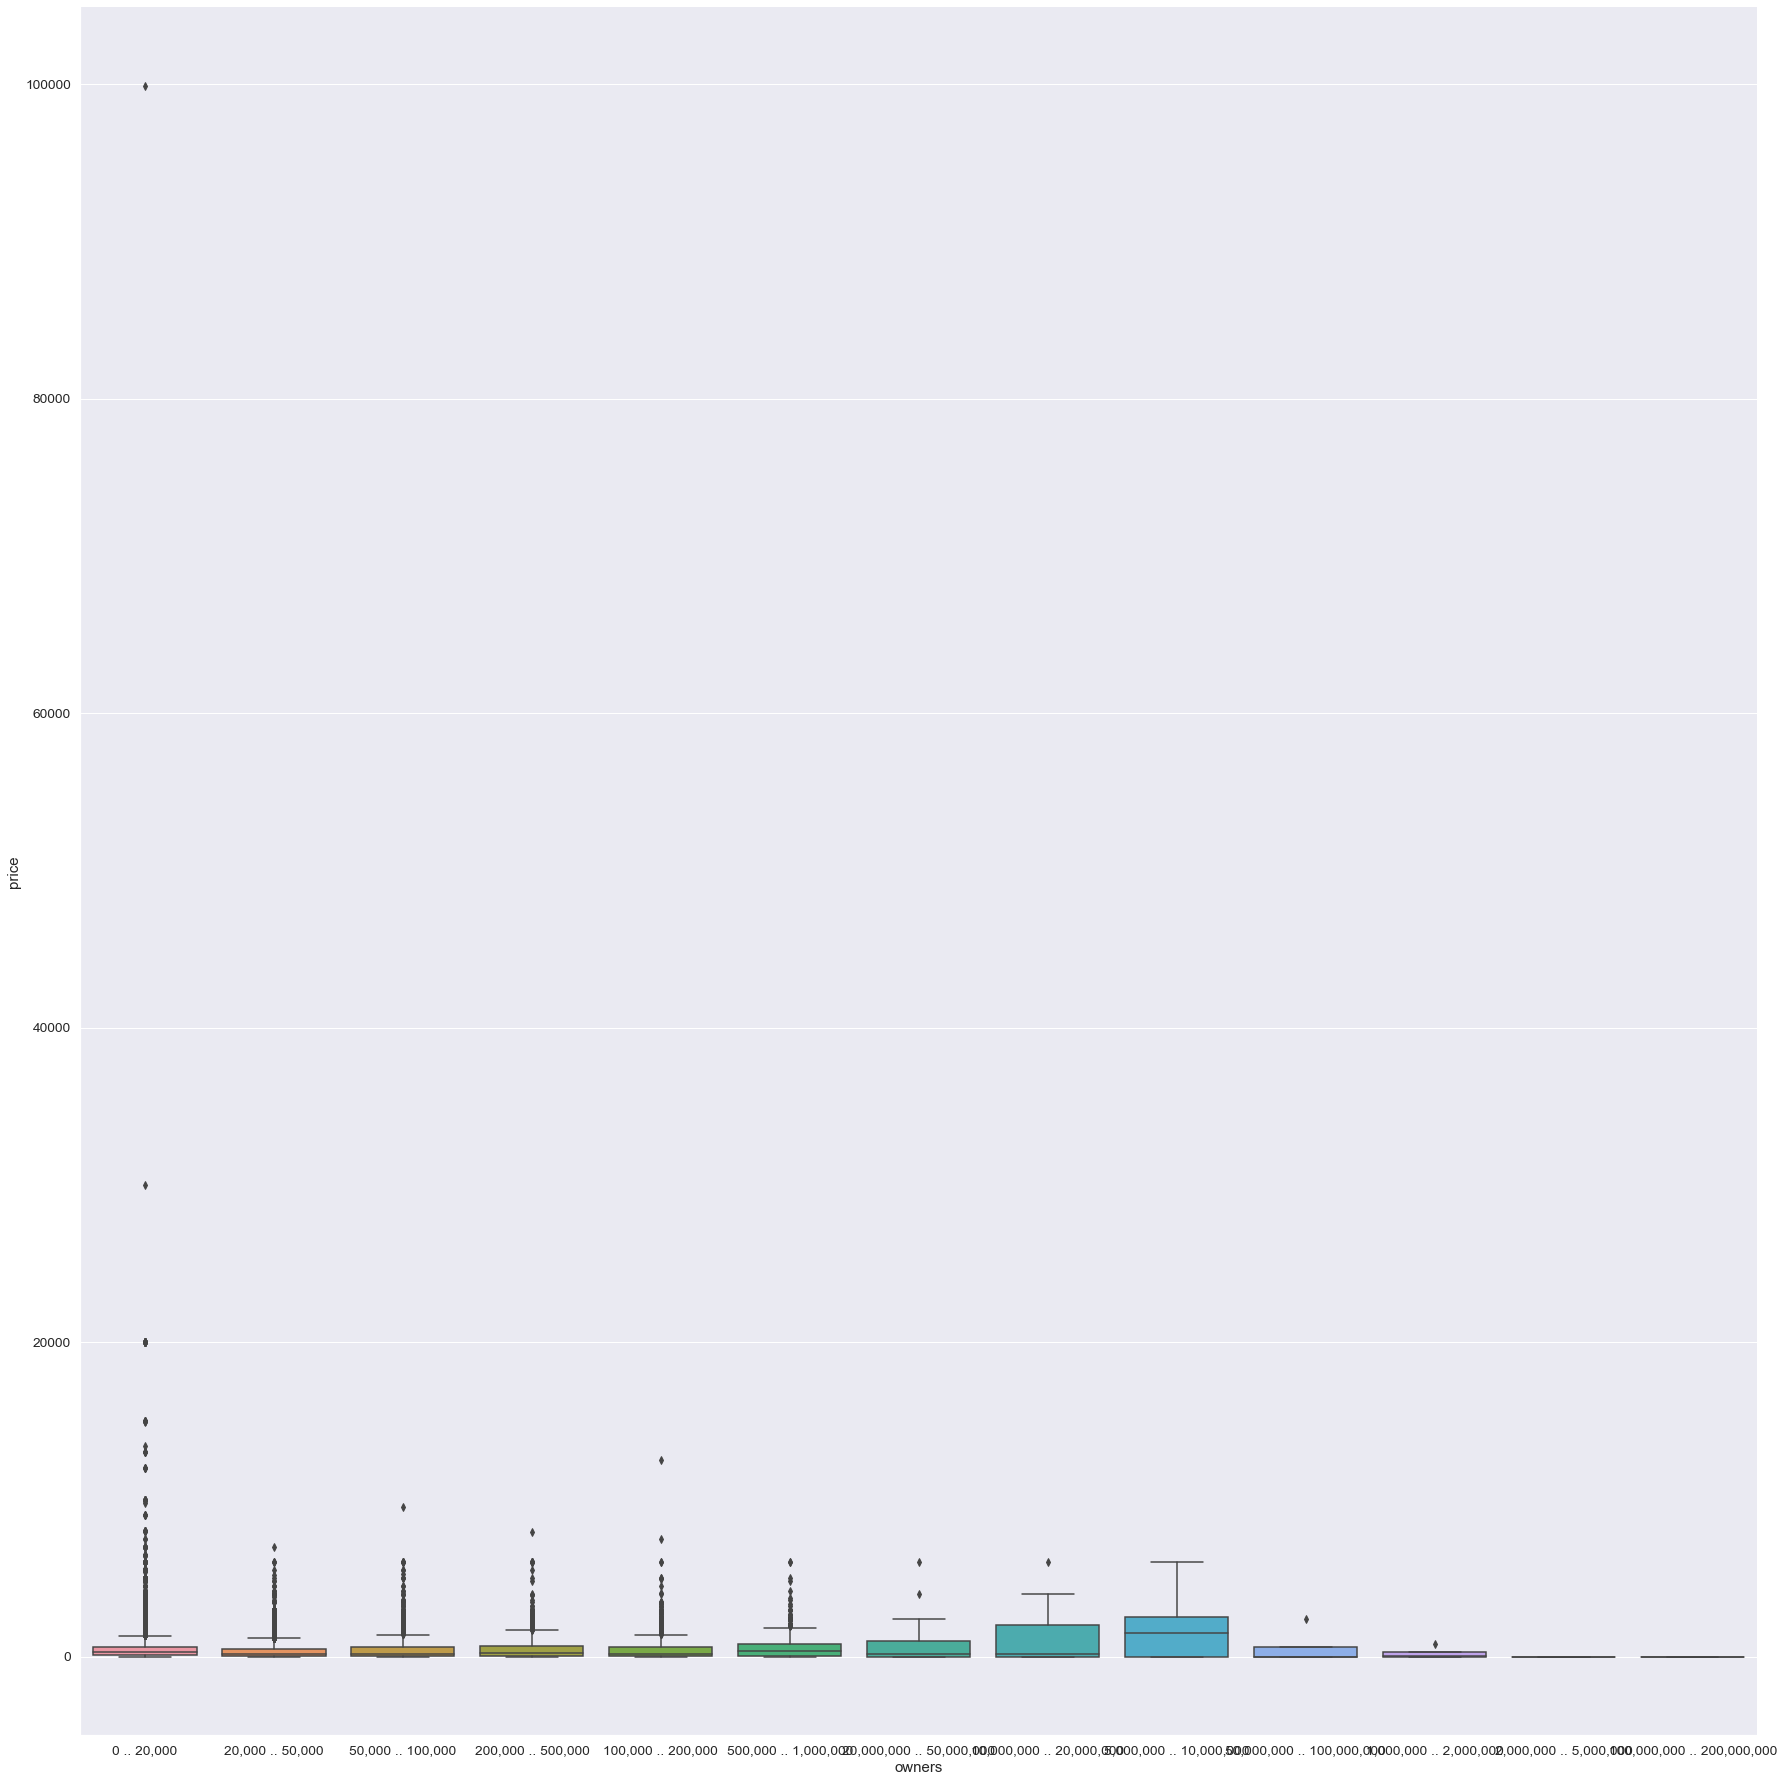

In [151]:
sns.catplot(x="owners", y="price", kind="box", data=gamedf, size = 25)


array([[<AxesSubplot:title={'center':'ccu'}>]], dtype=object)

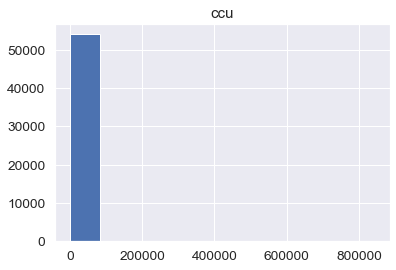

In [166]:
gamedf.hist(column='ccu')


<AxesSubplot:xlabel='price', ylabel='Density'>

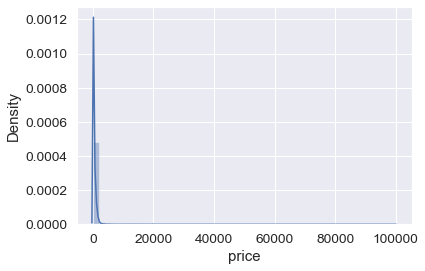

In [161]:
sns.distplot(gamedf['price'])


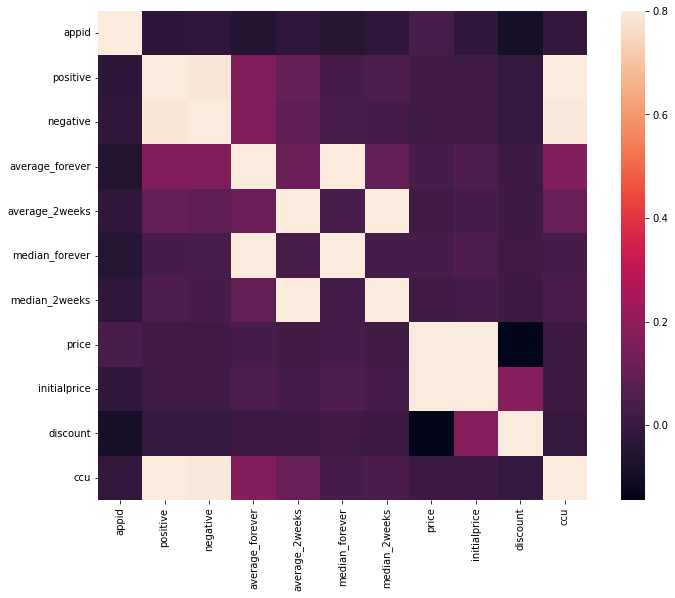

In [124]:
corrmat = gamedf.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

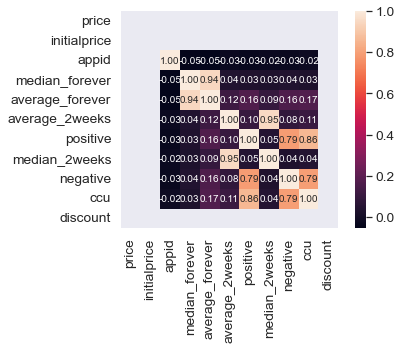

In [171]:
k = 17 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(gamedf[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<AxesSubplot:xlabel='discount', ylabel='Density'>

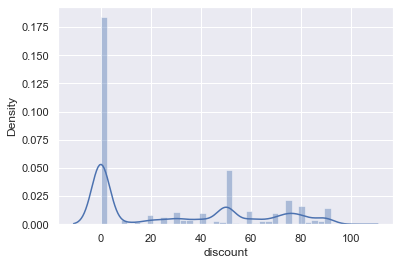

In [137]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(gamedf['discount'])

<AxesSubplot:xlabel='initialprice', ylabel='Density'>

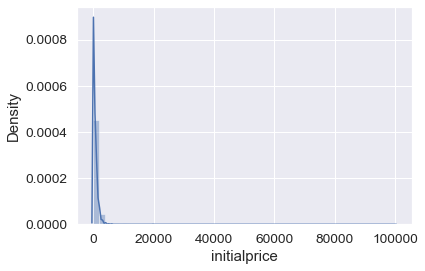

In [177]:

sns.set_style('darkgrid')
sns.distplot(gamedf['initialprice'])